# <center>Coexya SIG TP
---

In [82]:
import geopandas as gpd
import folium
import requests
from folium import plugins
import numpy as np

## Constants

In [49]:
INSA_COORDS = (45.782621, 4.878089)
URL_PISTES_LYON = "https://data.grandlyon.com/geoserver/metropole-de-lyon/ows?SERVICE=WFS&VERSION=2.0.0&request=GetFeature&typename=metropole-de-lyon:pvo_patrimoine_voirie.pvoamenagementcyclable&outputFormat=application/json&SRSNAME=EPSG:4171&sortBy=gid"
URL_STATIONS_LYON = "https://data.grandlyon.com/geoserver/metropole-de-lyon/ows?SERVICE=WFS&VERSION=2.0.0&request=GetFeature&typename=metropole-de-lyon:pvo_patrimoine_voirie.pvostationvelov&outputFormat=application/json&SRSNAME=EPSG:4171&sortBy=gid"
URL_PUBLIC_TOILETS_LYON = "https://data.grandlyon.com/geoserver/metropole-de-lyon/ows?SERVICE=WFS&VERSION=2.0.0&request=GetFeature&typename=metropole-de-lyon:adr_voie_lieu.adrtoilettepublique_latest&outputFormat=application/json&SRSNAME=EPSG:4171&sortBy=gid"
URL_BIBLIO_LYON = "https://data.grandlyon.com/geoserver/metropole-de-lyon/ows?SERVICE=WFS&VERSION=2.0.0&request=GetFeature&typename=metropole-de-lyon:adr_voie_lieu.adrequiculture&outputFormat=application/json&SRSNAME=EPSG:4171&sortBy=gid"
URL_IRIS_LYON = "https://data.grandlyon.com/geoserver/metropole-de-lyon/ows?SERVICE=WFS&VERSION=2.0.0&request=GetFeature&typename=metropole-de-lyon:ter_territoire.teriris_latest&outputFormat=application/json&SRSNAME=EPSG:4171&sortBy=gid"


## Code

### Maps and elements

In [61]:
def add_elements_to_map(map, url, name, color, weight):
    geojson = requests.get(url).json()
    folium.GeoJson(geojson, name=name, style_function= lambda feature: {"color":color, "weight":weight}).add_to(map)

In [113]:
map = folium.Map(location=INSA_COORDS, tiles="Cartodb positron ", zoom_start=15, control_scale=False)
add_elements_to_map(map, URL_PISTES_LYON, "Pistes cyclables", "green", 2)
add_elements_to_map(map, URL_STATIONS_LYON, "Stations Velov", "red", 2)
add_elements_to_map(map, URL_BIBLIO_LYON, "Bibliothèques", "purple", 2)
add_elements_to_map(map, URL_PUBLIC_TOILETS_LYON, "Toilettes Publiques", "yellow", 2)
add_elements_to_map(map, URL_IRIS_LYON, "Iris", "blue", 2)
folium.LayerControl().add_to(map)

map.save("./SIG_maps/map.html")

### Heatmaps and Geopandas

In [64]:
df_stations = gpd.read_file(URL_STATIONS_LYON)
df_stations.head()

,id,idstation,nom,adresse1,adresse2,commune,numdansarrondissement,nbbornettes,stationbonus,pole,ouverte,achevement,validite,gid,code_insee,geometry
0,pvo_patrimoine_voirie.pvostationvelov.1,8050,Bataille / Krüger,"Face 140, Rue Bataille",None,Lyon 8e Arrondissement,NaN,18,None,Logements,True,Monté,Validé,1,69388,POINT (4.87974 45.73627)
1,pvo_patrimoine_voirie.pvostationvelov.2,1012,Ampère / Bourse,"29, Rue de la Bourse",None,Lyon 1er Arrondissement,12.0,26,None,Lycée Ampère - Métro A,True,Monté,Validé,2,69381,POINT (4.8369 45.76581)
2,pvo_patrimoine_voirie.pvostationvelov.3,10072,Jacques Brel,"Face 4, Rue Jacques Brel",None,Villeurbanne,64.0,23,None,Tram T1 - Habitat dense - Quartier du Tonkin,True,Monté,Validé,3,69266,POINT (4.86429 45.77422)
3,pvo_patrimoine_voirie.pvostationvelov.4,9009,Berlioz / Chalinel,"34, Rue Hector Berlioz",Angle Rue Albert Chalinel,Lyon 9e Arrondissement,NaN,15,None,Commerces - Logements,True,Monté,Validé,4,69389,POINT (4.82542 45.80116)
4,pvo_patrimoine_voirie.pvostationvelov.5,5041,L'Homme de la Roche,"Face 56, Quai Pierre Scize",Place Bourgneuf,Lyon 5e Arrondissement,41.0,21,None,Itinéraire cyclable - Commerces - Logements,True,Monté,Validé,5,69385,POINT (4.82023 45.76658)


In [67]:
heatmap = folium.Map(location=INSA_COORDS, tiles="Cartodb dark_matter", zoom_start=12)
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in df_stations.geometry]
heat_data


[[45.73626799, 4.87973738],
 [45.76581138, 4.83689574],
 [45.77422069, 4.86429135],
 [45.80116036, 4.82541971],
 [45.76658034, 4.82023024],
 [45.77382012, 4.8095603],
 [45.77608504, 4.79973766],
 [45.79157368, 4.80853464],
 [45.7643337, 4.85349213],
 [45.72736933, 4.81463548],
 [45.77332704, 4.8519895],
 [45.7425795, 4.85056376],
 [45.75191144, 4.8437864],
 [45.75971832, 4.88994694],
 [45.78064416, 4.88349702],
 [45.7534495, 4.83336455],
 [45.76773469, 4.83213506],
 [45.74818691, 4.88059396],
 [45.73565039, 4.85304265],
 [45.75957436, 4.88273455],
 [45.76468151, 4.82898333],
 [45.77342963, 4.82132474],
 [45.73618158, 4.81533503],
 [45.78652474, 4.7970709],
 [45.72769678, 4.83738209],
 [45.76705446, 4.82704751],
 [45.77099064, 4.80758041],
 [45.73014381, 4.82781825],
 [45.71697594, 4.81406149],
 [45.76338371, 4.82901148],
 [45.73954181, 4.81513082],
 [45.76978221, 4.81267622],
 [45.77002124, 4.82929778],
 [45.7375181, 4.83750892],
 [45.76060856, 4.86308625],
 [45.76627174, 4.82743212],


In [114]:
plugins.HeatMap(heat_data).add_to(heatmap)
heatmap.save("./SIG_maps/heatmap.html")
heatmap

### Spatial Joins

In [74]:
df_iris = gpd.read_file(URL_IRIS_LYON)
df_iris.head()

,id,codeiris,libelle,type,typelibelle,commune,insee,gid,geometry
0,ter_territoire.teriris_latest.1025,690030000,Albigny-sur-Saône,Z,Commune non irisée,Albigny-sur-Saône,69003,1025,"POLYGON ((4.83686 45.86649, 4.83776 45.86532, ..."
1,ter_territoire.teriris_latest.1026,690290101,Les Genêts-Hôpitaux,H,Habitat,Bron,69029,1026,"POLYGON ((4.89185 45.73853, 4.89188 45.7391, 4..."
2,ter_territoire.teriris_latest.1027,690290102,Gendarmerie-Garenne,H,Habitat,Bron,69029,1027,"POLYGON ((4.90767 45.75106, 4.91091 45.75034, ..."
3,ter_territoire.teriris_latest.1028,690290103,Dubœuf-Camille Rousset,H,Habitat,Bron,69029,1028,"POLYGON ((4.90512 45.73472, 4.9023 45.73567, 4..."
4,ter_territoire.teriris_latest.1029,690290104,Ferdinand Buisson Église,H,Habitat,Bron,69029,1029,"POLYGON ((4.91682 45.73677, 4.91423 45.7363, 4..."


<Axes: >

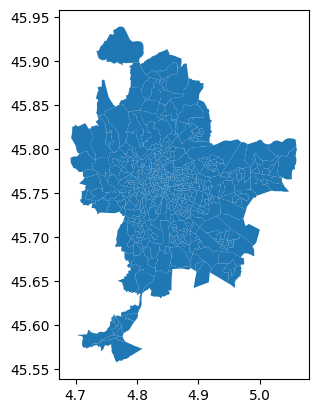

In [76]:
df_iris.plot()

In [79]:
join_right_df = df_stations.sjoin(df_iris, how="right")
join_left_df = df_stations.sjoin(df_iris, how="left")
join_right_df.head()

,index_left,id_left,idstation,nom,adresse1,adresse2,commune_left,numdansarrondissement,nbbornettes,stationbonus,...,code_insee,id_right,codeiris,libelle,type,typelibelle,commune_right,insee,gid_right,geometry
0,260.0,pvo_patrimoine_voirie.pvostationvelov.276,33001.0,Albigny - Gare,Place de la Gare,Angle Avenue de la Gare,Albigny-sur-Saône,NaN,18.0,None,...,69003,ter_territoire.teriris_latest.1025,690030000,Albigny-sur-Saône,Z,Commune non irisée,Albigny-sur-Saône,69003,1025,"POLYGON ((4.83686 45.86649, 4.83776 45.86532, ..."
1,343.0,pvo_patrimoine_voirie.pvostationvelov.364,3090.0,Vinatier,"95, Boulevard Pinel",None,Lyon 3e Arrondissement,90.0,20.0,None,...,69383,ter_territoire.teriris_latest.1026,690290101,Les Genêts-Hôpitaux,H,Habitat,Bron,69029,1026,"POLYGON ((4.89185 45.73853, 4.89188 45.7391, 4..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ter_territoire.teriris_latest.1027,690290102,Gendarmerie-Garenne,H,Habitat,Bron,69029,1027,"POLYGON ((4.90767 45.75106, 4.91091 45.75034, ..."
3,324.0,pvo_patrimoine_voirie.pvostationvelov.343,14001.0,Bron - Centre Nautique,"22, Rue de la Marne",Angle Place Gaillard Romanet,Bron,NaN,13.0,None,...,69029,ter_territoire.teriris_latest.1028,690290103,Dubœuf-Camille Rousset,H,Habitat,Bron,69029,1028,"POLYGON ((4.90512 45.73472, 4.9023 45.73567, 4..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ter_territoire.teriris_latest.1029,690290104,Ferdinand Buisson Église,H,Habitat,Bron,69029,1029,"POLYGON ((4.91682 45.73677, 4.91423 45.7363, 4..."


<Axes: >

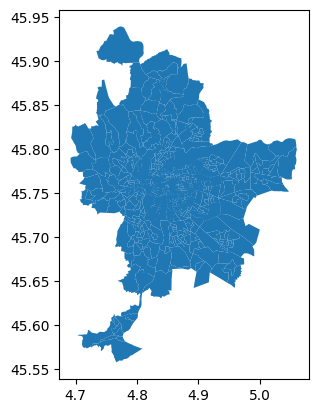

In [78]:
join_right_df.plot()

<Axes: >

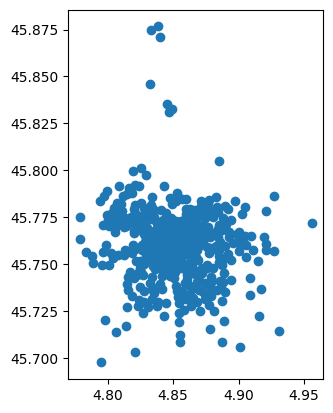

In [80]:
join_left_df.plot()

In [99]:
df_groupby = join_left_df.groupby('id_right').size().reset_index(name='count')
df_groupby.rename(columns={"id_right":"id"}, inplace=True)
df_groupby

,id,count
0,ter_territoire.teriris_latest.1025,1
1,ter_territoire.teriris_latest.1026,1
2,ter_territoire.teriris_latest.1028,1
3,ter_territoire.teriris_latest.1035,2
4,ter_territoire.teriris_latest.1036,1
...,...,...
213,ter_territoire.teriris_latest.1529,2
214,ter_territoire.teriris_latest.1530,3
215,ter_territoire.teriris_latest.1534,2
216,ter_territoire.teriris_latest.1536,1


In [101]:
df_iris_nb_stations = df_iris.merge(df_groupby, on='id', how='right')
df_iris_nb_stations.head()

,id,codeiris,libelle,type,typelibelle,commune,insee,gid,geometry,count
0,ter_territoire.teriris_latest.1025,690030000,Albigny-sur-Saône,Z,Commune non irisée,Albigny-sur-Saône,69003,1025,"POLYGON ((4.83686 45.86649, 4.83776 45.86532, ...",1
1,ter_territoire.teriris_latest.1026,690290101,Les Genêts-Hôpitaux,H,Habitat,Bron,69029,1026,"POLYGON ((4.89185 45.73853, 4.89188 45.7391, 4...",1
2,ter_territoire.teriris_latest.1028,690290103,Dubœuf-Camille Rousset,H,Habitat,Bron,69029,1028,"POLYGON ((4.90512 45.73472, 4.9023 45.73567, 4...",1
3,ter_territoire.teriris_latest.1035,690290301,Bron Sud,H,Habitat,Bron,69029,1035,"POLYGON ((4.934 45.73968, 4.93471 45.73769, 4....",2
4,ter_territoire.teriris_latest.1036,690290401,Hôtel de Ville Alsace-Lorraine,H,Habitat,Bron,69029,1036,"POLYGON ((4.91423 45.7363, 4.91682 45.73677, 4...",1


In [121]:
geojson_iris_nb_stations = df_iris_nb_stations.to_json()
geojson_iris_nb_stations

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"id": "ter_territoire.teriris_latest.1025", "codeiris": 690030000, "libelle": "Albigny-sur-Sa\\u00f4ne", "type": "Z", "typelibelle": "Commune non iris\\u00e9e", "commune": "Albigny-sur-Sa\\u00f4ne", "insee": "69003", "gid": 1025, "count": 1}, "geometry": {"type": "Polygon", "coordinates": [[[4.83686195, 45.86649306], [4.83776162, 45.86532369], [4.83835482, 45.86436016], [4.83910193, 45.86287079], [4.83926954, 45.86190428], [4.83917481, 45.85875414], [4.83763594, 45.85516633], [4.83731483, 45.85376911], [4.83409619, 45.85435284], [4.83112414, 45.85452264], [4.8296601, 45.85472651], [4.82932599, 45.85471931], [4.82920381, 45.8544943], [4.82698646, 45.8546833], [4.82674832, 45.85418725], [4.82665265, 45.85417889], [4.82157462, 45.85560746], [4.82033108, 45.85608868], [4.81924411, 45.85623679], [4.81872504, 45.85613256], [4.81845751, 45.85591619], [4.81744388, 45.85602077], [4.81869518, 45.85686894], 

In [122]:
iris_nb_stations_map = map = folium.Map(location=INSA_COORDS, tiles="Cartodb positron ", zoom_start=15, control_scale=False)
folium.Choropleth(
    geo_data=geojson_iris_nb_stations,
    name="Stations Per Iris",
    data=df_iris_nb_stations,
    columns=["libelle", "count"], 
    key_on="feature.properties.libelle",
    fill_opacity=0.6,      # More transparent fill
    line_opacity=0.8,      # Slightly transparent borders
    legend_name="Number of Stations"
).add_to(iris_nb_stations_map)
iris_nb_stations_map.save("./SIG_maps/iris_nb_stations_map.html")